In [1]:
import re
import kikuchipy as kp
from fastai.vision.all import *

steel_types = ["a", "f"] # do later, ["c", "s"]
n_steels = len(steel_types)

def breakdown(f_path):
    pat = r'[^\\_]+(?=_)+.+[^_.jpeg]'  
    pat = re.compile(pat)  
    extracted = pat.search(str(f_path)).group()
    #print(extracted)
    single_target = [float(lbl) for lbl in extracted.split("_")[1:]]
    
    one_hot = [0] * n_steels
    one_hot[steel_types.index(extracted[0])] = 1
    return one_hot + single_target

breakdown("steelData\\f_0.9046037197113037_-0.018439430743455887_0.31547197699546814_-0.2860586643218994")

if __name__ == '__main__':
    dblock = DataBlock(blocks=(ImageBlock, RegressionBlock), get_items = get_image_files, get_y = breakdown)
    dls = dblock.dataloaders("C:/KikuchiData/steelData/", batch_size = 32, shuffle = True, pin_memory = True, persistent_workers = True, device = torch.device("cuda"))
    #dls.show_batch()
    
    arc = resnet18

    learn = vision_learner(dls, arc, n_out = n_steels + 4, first_bn = True, 
                        concat_pool = True, pool = True)
    #learn.remove_cb(ProgressCallback)

    learn.loss = CrossEntropyLossFlat
    

c:\ProgramData\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


SuggestedLRs(valley=0.0010000000474974513)

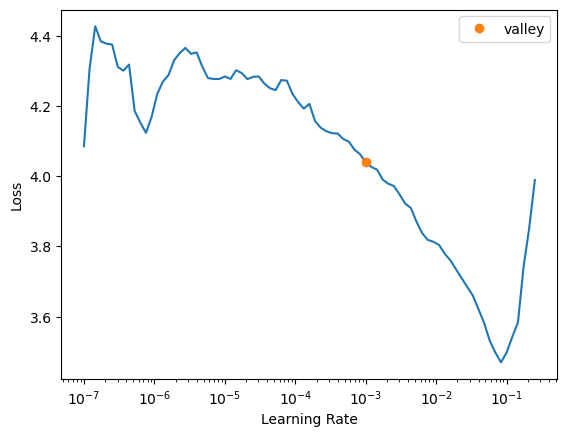

In [2]:
learn.lr_find()

In [3]:
learn.fit(50)

epoch,train_loss,valid_loss,time


KeyboardInterrupt: 

In [ ]:
interp = Interpretation.from_learner(learn)#, dl = dls)
interp.top_losses(5)

(TensorBase([0.1041, 0.1037, 0.0997, 0.0904, 0.0832]),
 TensorBase([  47,  462, 1796, 3784,  651]))

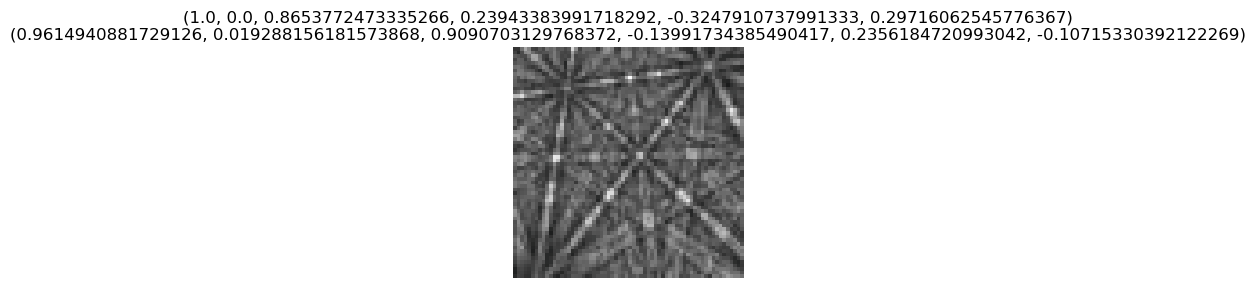

In [ ]:
x = interp.show_results([47])

In [ ]:
print(x)

None
